# Implementation of linear regression:

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

UPLOAD TRAIN AND TEST DATASET

In [2]:
train_df=pd.read_csv('C:/Users/adity/OneDrive/Desktop/WOC4.0/Linear and polynomial regression/Linear_train.csv', header=None)
test_df=pd.read_csv('C:/Users/adity/OneDrive/Desktop/WOC4.0/Linear and polynomial regression/Linear_test.csv', header=None)

In [3]:
train_df.columns = ['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T','label']
train_df.head()           # change columns name of train_data and print.

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,label
0,-9.989516,1564.957586,8.199060,32.508797,19.464400,1644.524093,26.100966,34.731954,4378.575414,-14.151587,...,770.535311,30.060441,-25.002361,11.892468,-34.329383,37.218423,-4.440530,29.075092,29.107896,311.232491
1,-17.591800,1559.053039,12.302737,-36.351098,6.256406,1640.834263,12.954212,-43.333128,4833.766813,36.194771,...,997.260070,-1.329145,16.022086,42.972484,-7.372877,45.550946,37.576551,12.926551,-32.565844,6393.112342
2,-28.321695,1305.900952,-35.681049,-9.039358,-45.519426,2039.003363,-0.154348,18.107957,4162.395297,-42.268524,...,616.059291,-6.997085,27.846844,26.511376,19.323152,-35.807513,-5.913019,15.046779,-34.332357,2601.046223
3,-40.471241,1612.746996,-28.980454,2.137719,-34.767491,2757.469393,23.857472,-48.434183,4340.953927,35.960309,...,715.537625,-12.441561,47.883434,36.994884,30.783992,22.162383,16.465836,41.435425,33.561233,13572.118110
4,-36.525271,1852.275617,-32.744347,-1.439526,-14.061837,2138.422485,44.061988,33.336936,4099.453685,28.212499,...,629.221442,10.992360,-47.143335,-8.296962,-8.086565,39.169726,-49.540056,-32.518653,-36.320202,-5462.446898


In [4]:
test_df.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'label']
test_df.head()           # change columns name of test_data and print.         

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,label
0,40.790740,1187.897579,-28.941991,43.498302,14.157983,2536.000797,-34.181638,-14.940211,4746.739893,-25.100480,...,707.727094,21.030812,-44.606156,-9.625546,42.276162,-11.000471,-19.830564,-5.529430,-28.154864,-163.522723
1,47.968749,1498.588679,24.922821,-38.979082,16.405452,1798.950305,-23.660484,-34.792328,4076.982013,16.042125,...,737.135391,-17.860346,42.274026,-19.886483,16.337922,9.025313,27.760845,21.484409,-24.206545,6484.664510
2,9.762564,1316.354415,1.170771,10.365178,-11.993156,2714.382200,26.382837,27.442924,4178.719984,-17.156579,...,940.732329,-35.879432,23.837924,3.729191,33.564390,12.848880,-45.837834,-49.592176,36.688611,2393.818082
3,6.414629,1895.586749,44.496934,-49.677800,-24.825833,2327.316373,1.406644,44.103008,4586.697737,-10.834562,...,925.441952,-19.409771,25.346975,-7.729920,-42.813516,-17.666168,35.506064,-49.048652,-34.048583,-9397.072355
4,-4.112012,1130.920162,19.103960,-8.741503,-28.589701,1299.418975,42.946135,4.758032,4809.536369,42.375164,...,797.953813,-46.788081,43.876292,34.009303,34.061089,-30.182903,-41.188733,26.828040,-22.476663,10487.323580


In [5]:
X_train = train_df.drop(['label'], axis=1)    # take features of train_data and test_data.
X_test = test_df.drop(['label'], axis=1) 

In [6]:
X_train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,-9.989516,1564.957586,8.199060,32.508797,19.464400,1644.524093,26.100966,34.731954,4378.575414,-14.151587,-22.778674,770.535311,30.060441,-25.002361,11.892468,-34.329383,37.218423,-4.440530,29.075092,29.107896
1,-17.591800,1559.053039,12.302737,-36.351098,6.256406,1640.834263,12.954212,-43.333128,4833.766813,36.194771,-25.540710,997.260070,-1.329145,16.022086,42.972484,-7.372877,45.550946,37.576551,12.926551,-32.565844
2,-28.321695,1305.900952,-35.681049,-9.039358,-45.519426,2039.003363,-0.154348,18.107957,4162.395297,-42.268524,10.855031,616.059291,-6.997085,27.846844,26.511376,19.323152,-35.807513,-5.913019,15.046779,-34.332357
3,-40.471241,1612.746996,-28.980454,2.137719,-34.767491,2757.469393,23.857472,-48.434183,4340.953927,35.960309,-25.781595,715.537625,-12.441561,47.883434,36.994884,30.783992,22.162383,16.465836,41.435425,33.561233
4,-36.525271,1852.275617,-32.744347,-1.439526,-14.061837,2138.422485,44.061988,33.336936,4099.453685,28.212499,-31.241339,629.221442,10.992360,-47.143335,-8.296962,-8.086565,39.169726,-49.540056,-32.518653,-36.320202


In [7]:
Y_train = train_df['label']     # take actual output of train_data and test_data.
Y_test = test_df['label']

In [8]:
Y_train                         # print actual output of training data.

0          311.232491
1         6393.112342
2         2601.046223
3        13572.118110
4        -5462.446898
             ...     
49995     9034.945727
49996    -6345.178110
49997     1483.917022
49998    10720.139180
49999     2185.127958
Name: label, Length: 50000, dtype: float64

DATA NORMALIZATION

FEATURES SCALING :

In [9]:
u1 = X_train.mean(0)             # u1 is the mean of training features data about axis = 0.
si1 = X_train.std(0)             # si1 is the standard deviation of training features data about axis = 0.
X_train = (X_train - u1)/si1     # Update features data using u1 and si1.

In [10]:
u2 = X_test.mean(0)             # u2 is the mean of testing features data about axis = 0.
si2 = X_test.std(0)             # si2 is the standard deviation of testing features data about axis = 0.
X_test = (X_test - u2)/si2      # Update features data using u2 and si2.

In [11]:
u3 = Y_train.mean(0)            # u3 is the mean of training actual output data about axis = 0.
si3 = Y_train.std(0)            # si3 is the standard deviation of training actual output data about axis = 0.
Y_train = (Y_train - u3)/si3    # Update training actual output data using u3 and si3.

In [12]:
X_train.head()                  # print new updated training features.

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,-0.347991,0.220312,0.285110,1.133715,0.678330,-0.610903,0.898280,1.199218,-0.424613,-0.488306,-0.788136,0.138291,1.028725,-0.863910,0.423651,-1.184218,1.284498,-0.155822,1.005271,1.008755
1,-0.611140,0.199847,0.427126,-1.254843,0.220549,-0.617274,0.443115,-1.502330,1.151147,1.258909,-0.883683,1.707571,-0.056831,0.558906,1.497778,-0.253123,1.572980,1.294387,0.446828,-1.123392
2,-0.982550,-0.677569,-1.233452,-0.307475,-1.573969,0.070213,-0.010727,0.623922,-1.172975,-1.464073,0.375353,-0.930919,-0.252847,0.969013,0.928881,0.668976,-1.243750,-0.206644,0.520149,-1.184463
3,-1.403101,0.385949,-1.001564,0.080227,-1.201313,1.310732,0.820607,-1.678859,-0.554849,1.250773,-0.892016,-0.242377,-0.441135,1.663925,1.291192,1.064841,0.763239,0.565756,1.432712,1.162713
4,-1.266513,1.216147,-1.131821,-0.043858,-0.483668,0.241872,1.520124,1.150941,-1.390864,0.981893,-1.080885,-0.839817,0.369288,-1.631806,-0.274098,-0.277774,1.352054,-1.712420,-1.124743,-1.253185


COMPUTE COST FUNCTION

In [13]:
# Declare cost fuction.
def compute_cost(X, Y, theta):    
    m = len(X)                # m is the total no. of items.
   
    
    y_pred = (X @ theta)      # y_pred is matrix multiplycation of X and theta.

    cost = (1/(2*m))*(np.sum(np.square(y_pred - Y_train)))     # this is the expression of cost function of linear regression.
    
    return cost               # return value is cost.

In [14]:
compute_cost(X_train, Y_train, np.zeros(X_train.shape[1]))   # initial cost value.

0.4999900000000002

COMPUTE GRADIENT DESCENT

In [15]:
# Declare Gradient Descent function. 
def gradient_descent(X, Y, learning_rate, iteration):
    m = Y.size                                # m is the total no. of items.
    theta = np.zeros(X.shape[1])              # create theta as a numpy array of dimension (X.shape[1], 1) and assign zero.
    cost_list = []                            # create cost_list as a list for storing cost value of each iteration.
   

 # loop for predicting y_pred(hypothesis function), update theta, cost on updated theta and store cost into cost_list.
    
    for i in range(iteration):
        
        y_pred = np.dot(X, theta)
    
        d_theta = (1/m)*(np.dot(X.T, y_pred - Y))
    
        theta = theta - learning_rate*d_theta
        
        cost = compute_cost(X, Y,theta)
         
        cost_list.append(cost)
        
    print (cost_list[-5:])          # print last 5 value of cost.
         
    return theta, cost_list         # return value is theta and cost_list.

In [16]:
iteration = 100                     # no.of iterations.

# Call the gradient_descent function for training data by input as X_train(features), Y_train(actual output), alpha, iteration.
theta, cost_list = gradient_descent(X_train, Y_train, 0.1, 100)

[7.805311977438922e-05, 7.805294171477244e-05, 7.805279716314943e-05, 7.805267981193555e-05, 7.805258454125511e-05]


In [17]:
print(theta)         # print final theta value.

[ 0.07583216  0.01166369 -0.15792533  0.04670359  0.21606241  0.01764292
  0.11100664 -0.16945525  0.00701301  0.13402788  0.18134153  0.01749405
 -0.53230516  0.19837077  0.26328365  0.29878817  0.14027958 -0.00591824
  0.55554224  0.14633539]


PLOT THE CURVE COST VS ITERATION

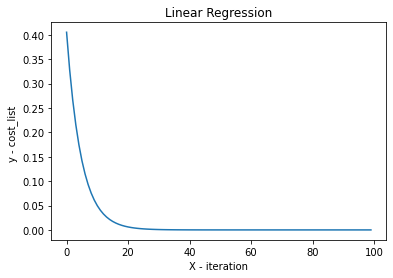

In [18]:
rng = np.arange(iteration)  
plt.plot(rng, cost_list)
plt.xlabel('X - iteration')
plt.ylabel('y - cost_list ')
plt.title('Linear Regression')
plt.show()

TESTED ON TESTING DATA

In [19]:
Y_test_pred = np.dot(X_test, theta):""" predict output value of testing features but here y_test_pred is scaled
                                                       due to y_train is scaled so required descaling of predicted value."""

In [20]:
Y_test_pred           # print prediction of testing features.

array([-0.35826486,  0.98826257,  0.15886914, ..., -0.61416802,
        0.07496868, -1.56553316])

In [21]:
Y_test_pred = (Y_test_pred * si3 + u3)     # Descaling prediction of testing features.

In [22]:
Y_test_pred        # print prediction on testing features.

array([ -233.50835183,  6422.42991001,  2322.70539861, ...,
       -1498.44780286,  1907.98212077, -6201.08329866])

In [23]:
RMSE = np.sqrt(np.mean((Y_test_pred - Y_test)**2)) """ calculate RMSE and print for predicted how concentrated the 
                                                                 data is around the line of best fit."""
RMSE

74.67564526635033